# Caso 8: Programación de turnos - Implementación

---
## Maestría en Inteligencia Analítica de Datos

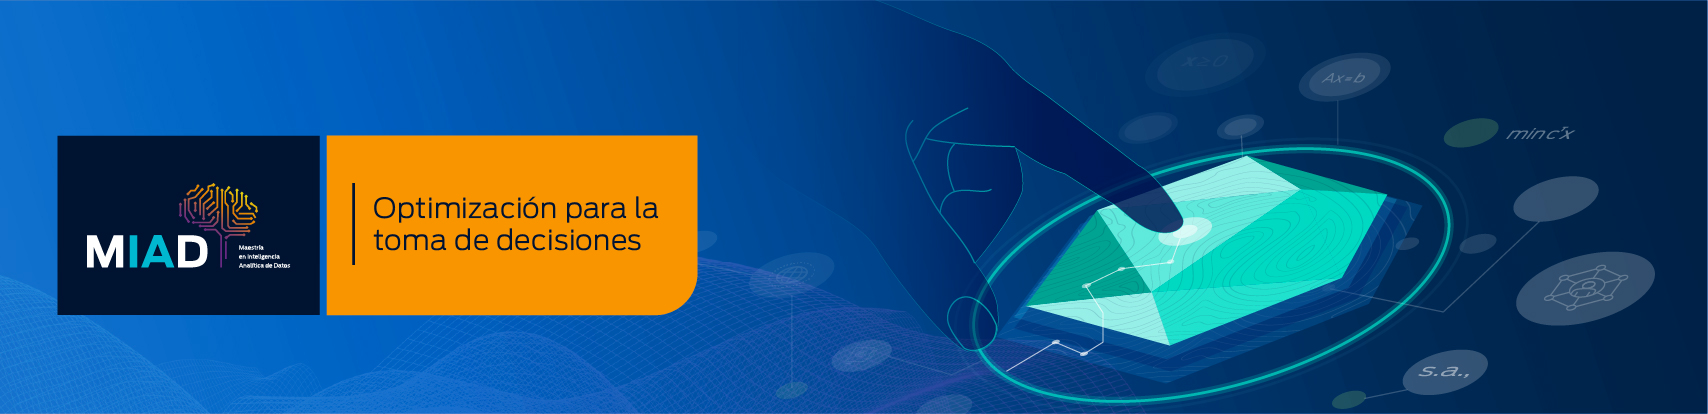

* **Profesor**: 
    * *Andrés Medaglia*
* **Tutor Líder**:
    * *Daniel Yamín*
* **Tutores**: 
    * *Alfaima Solano*
    * *Alejandro Mantilla*
    * *Ariel Rojas*
    * *Juan Betancourt*
    * *Mauricio Delgado*
    * *Nicolás Guerrero*
    * *Nicole Ramírez*

## Instrucciones generales

El primer paso antes de resolver este laboratorio es leer y entender el **enunciado del caso**. Una vez tengas claro el caso, te explicamos la estructura de este laboratorio (los demás laboratorios siguen una estrucutra similar). 

Este laboratorio contiene: 
* **Formulación**: Un breve resumen del modelo con notación matemática y descripción de sus componentes
* **Importación de librerías**
* **Creación de parámetros**
* **Modelado - Escenario 1**
* **Reporte de Resultados - Escenario 1**
* **Modelado - Escenario 2**
* **Reporte de Resultados - Escenario 2**

Este tipo de actividades se evaluará sobre un total de 100 puntos. Las celdas calificables se distinguen por tener la instrucción `# your code here`. Antes de estas celdas  encontrarás instrucciones y consejos para resolver las preguntas, también el puntaje que le corresponde.

¡Éxitos!

## Formulación
---

Te presentamos la formulación del caso de la semana de forma resumida. Te recomendamos revisar la formulación una vez hayas leído el enunciado del caso. Es bueno que te familiarices con los elementos de la formulación antes de iniciar la implementación.

### Conjuntos y Parámetros
>#### **Conjuntos**
>* $T$: conjunto de turnos
>* $F$: conjunto de franjas horarias

>#### **Parámetros**
>* $c_t$: costo diario de contratar un domiciliario de turno $t\in T$
>* $d_f$: cantidad mínima de domiciliarios requeridos en la franja $f\in F$
>* $a_{ft}= \begin{cases}1, & \text{el turno } t\in T \text{ cubre la franja } f\in F \\ 0, & \text{de lo contrario}\end{cases} $

### Variables de Decisión
>* $x_{t}$: cantidad de domiciliarios del turno $t\in T$ a contratar

### Restricciones
> *# Para desarrollo del estudiante*
>> `# Para desarrollo del estudiante`

> Naturaleza de las variables
>> `# Para desarrollo del estudiante`

### Función Objetivo
> *# Para desarrollo del estudiante*
>> `# Para desarrollo del estudiante`

## Importación de librerías
---

In [1]:
import pulp as lp
import pandas as pd
from datetime import datetime

## Creación de Parámetros
---

**Importación de parámetros desde archivo local**

In [2]:
archivo = "Soporte Caso 8.xlsx"
turnos_esc_1 = pd.read_excel(archivo, sheet_name="Turnos Escenario 1")
turnos_esc_2 = pd.read_excel(archivo, sheet_name="Turnos Escenario 2")
costos_esc_1 = pd.read_excel(archivo, sheet_name="Costos Escenario 1")
costos_esc_2 = pd.read_excel(archivo, sheet_name="Costos Escenario 2")

### Conjuntos

Para crear los conjuntos utilizamos algunos de los parámetros importados, recomendados mucho que explores estos parámetros luego de la importación.

In [3]:
# Conjunto turnos en el escenario 1
Turnos_1 = list(turnos_esc_1.columns[2:])

# Conjunto turnos en el escenario 2
Turnos_2 = list(turnos_esc_2.columns[2:])

# Conjunto de franjas horarias
Franjas = list(turnos_esc_1.Franjas)

### Parámetros

In [4]:
# Parámetros indexados en turnos
costos_1 = {row[0]: row[1] for _, row in costos_esc_1.iterrows()}
costos_2 = {row[0]: row[1] for _, row in costos_esc_2.iterrows()}

# Parámetros indexados en franjas horarias
demandas = {row[0]: row[1] for _, row in turnos_esc_1.iterrows()}

# Parámetros indexados en (franja, turno)
cubrimiento_1 = {}
for _, row in turnos_esc_1.iterrows():
    f = row[0]
    for t in Turnos_1:
        cubrimiento_1[f, t] = row[t]

cubrimiento_2 = {}
for _, row in turnos_esc_2.iterrows():
    f = row[0]
    for t in Turnos_2:
        cubrimiento_2[f, t] = row[t]

**Celda de Prueba (0 puntos)**

Es una buena práctica imprimir algunos objetos que contienen los parámetros en la consola luego de crearlos. De esta forma puedes corregir errores y familiarizarte con las estrucutras de datos que se van a utilizar. Puedes hacer estas pruebas en la celda a continuación.

* **Esta celda no es calificable**

In [5]:
# Aquí puedes explorar los parámetros
cubrimiento_1

{('11:00am - 11:30am', 'Turno 1'): 1,
 ('11:00am - 11:30am', 'Turno 2'): 0,
 ('11:00am - 11:30am', 'Turno 3'): 0,
 ('11:00am - 11:30am', 'Turno 4'): 0,
 ('11:00am - 11:30am', 'Turno 5'): 0,
 ('11:30am - 12:00pm', 'Turno 1'): 1,
 ('11:30am - 12:00pm', 'Turno 2'): 0,
 ('11:30am - 12:00pm', 'Turno 3'): 0,
 ('11:30am - 12:00pm', 'Turno 4'): 0,
 ('11:30am - 12:00pm', 'Turno 5'): 0,
 ('12:00pm - 12:30pm', 'Turno 1'): 1,
 ('12:00pm - 12:30pm', 'Turno 2'): 1,
 ('12:00pm - 12:30pm', 'Turno 3'): 0,
 ('12:00pm - 12:30pm', 'Turno 4'): 0,
 ('12:00pm - 12:30pm', 'Turno 5'): 0,
 ('12:30pm - 1:00pm', 'Turno 1'): 1,
 ('12:30pm - 1:00pm', 'Turno 2'): 1,
 ('12:30pm - 1:00pm', 'Turno 3'): 0,
 ('12:30pm - 1:00pm', 'Turno 4'): 0,
 ('12:30pm - 1:00pm', 'Turno 5'): 0,
 ('1:00pm - 1:30pm', 'Turno 1'): 1,
 ('1:00pm - 1:30pm', 'Turno 2'): 1,
 ('1:00pm - 1:30pm', 'Turno 3'): 1,
 ('1:00pm - 1:30pm', 'Turno 4'): 0,
 ('1:00pm - 1:30pm', 'Turno 5'): 0,
 ('1:30pm - 2:00pm', 'Turno 1'): 1,
 ('1:30pm - 2:00pm', 'Turno 2

In [6]:
costos_1

{'Turno 1': 63600,
 'Turno 2': 63600,
 'Turno 3': 63600,
 'Turno 4': 63600,
 'Turno 5': 63600}

In [7]:
Turnos_1

['Turno 1', 'Turno 2', 'Turno 3', 'Turno 4', 'Turno 5']

In [8]:
Franjas

['11:00am - 11:30am',
 '11:30am - 12:00pm',
 '12:00pm - 12:30pm',
 '12:30pm - 1:00pm',
 '1:00pm - 1:30pm',
 '1:30pm - 2:00pm',
 '2:00pm - 2:30pm',
 '2:30pm - 3:00pm',
 '3:00pm - 3:30pm',
 '3:30pm - 4:00pm',
 '4:00pm - 4:30pm',
 '4:30pm - 5:00pm',
 '5:00pm - 5:30pm',
 '5:30pm - 6:00pm',
 '6:00pm - 6:30pm',
 '6:30pm - 7:00pm',
 '7:00pm - 7:30pm',
 '7:30pm - 8:00pm',
 '8:00pm - 8:30pm',
 '8:30pm - 9:00pm',
 '9:00pm - 9:30pm',
 '9:30pm - 10:00pm',
 '10:00pm - 10:30pm',
 '10:30pm - 11:00pm']

## Modelamiento - Escenario 1
---
Primero, vamos a explorar el problema desde el primer escenario. Es **muy importante** que utilices los parámetros que corresponden a este escenario durante la creación del modelo.

### Declaración del modelo

**Pregunta 1 (2 puntos)**
* Crea un objeto modelo en PuLP llamado `problema`

In [9]:
# your code here
problema = lp.LpProblem(sense=lp.LpMinimize)

In [10]:
# Esta celda esta reservada para uso del equipo docente

In [11]:
# Esta celda esta reservada para uso del equipo docente

### Variables de Decisión

> $x_{t}$: cantidad de domiciliarios del turno $t\in T$ a contratar
>> `# Para desarrollo del estudiante`

**Pregunta 2 (6 puntos)**
* Crea las variables del modelo: `x`, usando el método `lp.LpVariable.dicts()`
* Especifica el nombre de la variable como `'contratar'` con el argumento `name`
* Especifica sus índices con el argumento `indexs`
* Especifica que el límite inferior de la variable es 0
* Especifica su naturaleza con el argumento `cat`

In [12]:
# your code here
x = lp.LpVariable.dicts(name="contratar" , indexs= [i for i in Turnos_1], lowBound = 0, cat=lp.LpInteger)
x

{'Turno 1': contratar_Turno_1,
 'Turno 2': contratar_Turno_2,
 'Turno 3': contratar_Turno_3,
 'Turno 4': contratar_Turno_4,
 'Turno 5': contratar_Turno_5}

In [13]:
# Esta celda esta reservada para uso del equipo docente

In [14]:
# Esta celda esta reservada para uso del equipo docente

### Función Objetivo

> *# Para desarrollo del estudiante*
>> `# Para desarrollo del estudiante`

**Pregunta 3 (10 puntos)**
* Crea la función objetivo y agrégala al modelo `problema`

In [15]:
# your code here
problema += lp.lpSum([costos_1[j] * x[j] for j in Turnos_1])
problema

NoName:
MINIMIZE
63600*contratar_Turno_1 + 63600*contratar_Turno_2 + 63600*contratar_Turno_3 + 63600*contratar_Turno_4 + 63600*contratar_Turno_5 + 0
VARIABLES
0 <= contratar_Turno_1 Integer
0 <= contratar_Turno_2 Integer
0 <= contratar_Turno_3 Integer
0 <= contratar_Turno_4 Integer
0 <= contratar_Turno_5 Integer

In [16]:
# Esta celda esta reservada para uso del equipo docente

### Restricciones
    
> **Advertencia**: `pulp` no permite sobreescribir restricciones, entonces, si ya creaste una restricción y quieres crearla de nuevo para corregir algo, asegúrate de volver a crear el modelo `problema` desde el principio. (Nosotros haremos esto antes de calificar, no te preocupes)

**Pregunta 4 (15 puntos)**

* Crea el **único** grupo de restricciones del modelo, asígnale el nombre `'R1_'+str(<indice_del_para_todo>)` y añádela al modelo

> *# Para desarrollo del estudiante*
>> `# Para desarrollo del estudiante`

> **Nota:** ten en cuenta que el parámetro $d_f$ se define como la cantidad **mínima** de domiciliarios requeridos en la franja $f\in F$.

In [17]:
# your code here
for i in Franjas:
    problema += lp.lpSum([cubrimiento_1[(i, j)] * x[j] for j in Turnos_1]) >= demandas[i], 'R1_'+str(i)


In [18]:
# Esta celda esta reservada para uso del equipo docente

### Invocar el optimizador

In [19]:
inicio = datetime.now()
problema.solve()
print("Tiempo transcurrido:", datetime.now() - inicio)

Tiempo transcurrido: 0:00:00.011889


## Reporte de resultados - Escenario 1
---

**Estado del optimizador, función objetivo y otros indicadores**

**Pregunta 5 (2 puntos)**

* Despues de haber corrido el modelo: `<modelo>.solve()`, asigna a una nueva variable `estado` el estado del optimizador en palabras según `lp.LpStatus`.
* Asigna el valor de la función objetivo a la variable `obj`

In [20]:
# your code here
estado=lp.LpStatus[problema.status]
obj = lp.value(problema.objective)
obj,estado

(826800.0, 'Optimal')

In [21]:
# Esta celda esta reservada para uso del equipo docente

**Contratación de domiciliarios**

Después de correr el modelo, seguramente queremos conocer cuantos domiciliarios se contratan de cada turno para dar una recomedación a la empresa. De esto se trata la siguiente pregunta. 

**Pregunta 6 (10 puntos)**

* Guarda el total de domiciliarios a contratar en la variable `total`
* Guarda en un diccionario `contratacion` los empleados contratados en cada turno, tal que las **llaves** sean los turnos que pertecen a `Turnos_1` y los **valores** sean el número de domiciliarios a contratar para ese turno (utiliza `int()` para convertir estos valores a enteros)


**Nota:** dado que ya pasó el proceso de optimización, en caso de ser necesario, se debe usar la función `sum` y no `lp.lpSum` para recuperar resultados.

In [22]:
# your code here
problema.solve()

total = 0
for j in Turnos_1:
    total += lp.value(x[j])
    
contratacion = {}
for j in Turnos_1:
    contratacion[j] = int(lp.value(x[j]))
    
    
total, contratacion

(13.0, {'Turno 1': 2, 'Turno 2': 3, 'Turno 3': 0, 'Turno 4': 6, 'Turno 5': 2})

In [23]:
# Esta celda esta reservada para uso del equipo docente

## Visualizaciones - Escenario 1
---

**Cubrimiento de demanda en franjas horarias**

Esta visualización es muy útil para comparar los dos escenarios. Cuando termines con el segundo escenario, asegúrate de volver a esta celda y comprobar la diferencia!

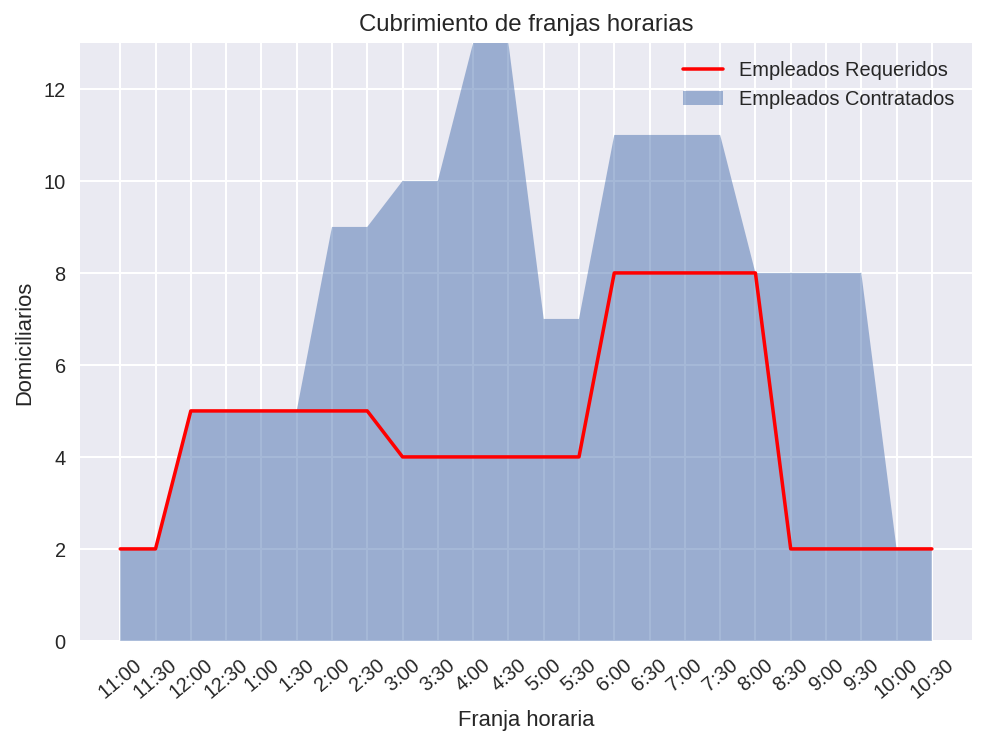

In [24]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

Franjas_ = []
for f in Franjas:
    if f[4] == "p":
        Franjas_.append(f[:4])
    else:
        Franjas_.append(f[:5])

oferta = [sum(cubrimiento_1[f, t] * x[t].value() for t in Turnos_1) for f in Franjas]

plt.plot(Franjas_, list(demandas.values()), c="r", label="Empleados Requeridos")
plt.fill_between(Franjas_, oferta, alpha=0.5, label="Empleados Contratados")
plt.legend()
plt.xticks(rotation=40)
plt.xlabel("Franja horaria")
plt.ylabel("Domiciliarios")
plt.ylim(0, 13)
plt.title("Cubrimiento de franjas horarias")
plt.show()

## Modelamiento - Escenario 2
---
Ahora, vamos a explorar el problema desde el segundo escenario. Es **muy importante** que utilices los parámetros que corresponden a este escenario durante la creación del modelo.

### Declaración del modelo

**Pregunta 7 (2 puntos)**
* Crea un objeto modelo en PuLP llamado `problema2`

In [25]:
# your code here
problema2 = lp.LpProblem(sense=lp.LpMinimize)

In [26]:
# Esta celda esta reservada para uso del equipo docente

In [27]:
# Esta celda esta reservada para uso del equipo docente

### Variables de Decisión

> $x_{t}$: cantidad de domiciliarios del turno $t\in T$ a contratar
>> `# Para desarrollo del estudiante`

**Pregunta 8 (6 puntos)**
* Crea las variables del modelo: `x`, usando el método `lp.LpVariable.dicts()`
* Especifica el nombre de la variable como `'contratar'` con el argumento `name`
* Especifica sus índices con el argumento `indexs`
* Especifica que el límite inferior de la variable es 0
* Especifica su naturaleza con el argumento `cat`

In [28]:
# your code here
x = lp.LpVariable.dicts(name="contratar" , indexs= [i for i in Turnos_2], lowBound = 0, cat=lp.LpInteger)
x

{'Turno 1': contratar_Turno_1,
 'Turno 2': contratar_Turno_2,
 'Turno 3': contratar_Turno_3,
 'Turno 4': contratar_Turno_4,
 'Turno 5': contratar_Turno_5,
 'Turno 6': contratar_Turno_6,
 'Turno 7': contratar_Turno_7,
 'Turno 8': contratar_Turno_8,
 'Turno 9': contratar_Turno_9,
 'Turno 10': contratar_Turno_10,
 'Turno 11': contratar_Turno_11,
 'Turno 12': contratar_Turno_12,
 'Turno 13': contratar_Turno_13,
 'Turno 14': contratar_Turno_14,
 'Turno 15': contratar_Turno_15,
 'Turno 16': contratar_Turno_16,
 'Turno 17': contratar_Turno_17,
 'Turno 18': contratar_Turno_18,
 'Turno 19': contratar_Turno_19,
 'Turno 20': contratar_Turno_20,
 'Turno 21': contratar_Turno_21,
 'Turno 22': contratar_Turno_22,
 'Turno 23': contratar_Turno_23,
 'Turno 24': contratar_Turno_24,
 'Turno 25': contratar_Turno_25,
 'Turno 26': contratar_Turno_26,
 'Turno 27': contratar_Turno_27,
 'Turno 28': contratar_Turno_28}

In [29]:
# Esta celda esta reservada para uso del equipo docente

In [30]:
# Esta celda esta reservada para uso del equipo docente

### Función Objetivo

> *# Para desarrollo del estudiante*
>> `# Para desarrollo del estudiante`

**Pregunta 9 (10 puntos)**
* Crea la función objetivo y agrégala al modelo `problema2`

In [31]:
problema2 += lp.lpSum([costos_2[j] * x[j] for j in Turnos_2])
problema2

NoName:
MINIMIZE
63600*contratar_Turno_1 + 58260*contratar_Turno_10 + 58260*contratar_Turno_11 + 58260*contratar_Turno_12 + 58260*contratar_Turno_13 + 58260*contratar_Turno_14 + 58260*contratar_Turno_15 + 58260*contratar_Turno_16 + 58260*contratar_Turno_17 + 58260*contratar_Turno_18 + 36000*contratar_Turno_19 + 63600*contratar_Turno_2 + 36000*contratar_Turno_20 + 36000*contratar_Turno_21 + 36000*contratar_Turno_22 + 36000*contratar_Turno_23 + 36000*contratar_Turno_24 + 36000*contratar_Turno_25 + 36000*contratar_Turno_26 + 36000*contratar_Turno_27 + 36000*contratar_Turno_28 + 63600*contratar_Turno_3 + 63600*contratar_Turno_4 + 63600*contratar_Turno_5 + 58260*contratar_Turno_6 + 58260*contratar_Turno_7 + 58260*contratar_Turno_8 + 58260*contratar_Turno_9 + 0
VARIABLES
0 <= contratar_Turno_1 Integer
0 <= contratar_Turno_10 Integer
0 <= contratar_Turno_11 Integer
0 <= contratar_Turno_12 Integer
0 <= contratar_Turno_13 Integer
0 <= contratar_Turno_14 Integer
0 <= contratar_Turno_15 Integer
0

In [32]:
# Esta celda esta reservada para uso del equipo docente

### Restricciones
    
> **Advertencia**: `pulp` no permite sobreescribir restricciones, entonces, si ya creaste una restricción y quieres crearla de nuevo para corregir algo, asegurate de volver a crear el modelo `problema` desde el principio. (Nosotros haremos esto antes de calificar, no te preocupes)

**Pregunta 10 (15 puntos)**

* Crea el **único** grupo de restricciones del modelo, asígnale el nombre `'R1_'+str(<indice_del_para_todo>)` y añádela al modelo

> *# Para desarrollo del estudiante*

> **Nota:** ten en cuenta que el parámetro $d_f$ se define como la cantidad **mínima** de domiciliarios requeridos en la franja $f\in F$.


In [33]:
# your code here
for i in Franjas:
    problema2 += lp.lpSum([cubrimiento_2[(i, j)] * x[j] for j in Turnos_2]) >= demandas[i], 'R1_'+str(i)

In [34]:
# Esta celda esta reservada para uso del equipo docente

### Invocar el optimizador

In [35]:
inicio = datetime.now()
problema2.solve()
print("Tiempo transcurrido:", datetime.now() - inicio)

Tiempo transcurrido: 0:00:00.014322


## Reporte de resultados - Escenario 2
---

**Estado del optimizador, función objetivo y otros indicadores**

**Pregunta 11 (2 puntos)**

* Despues de haber corrido el modelo: `<modelo>.solve()`, asigna a una nueva variable `estado` el estado del optimizador en palabras según `lp.LpStatus`.
* Asigna el valor de la función objetivo a la variable `obj`


In [36]:
# your code here
estado=lp.LpStatus[problema2.status]
obj = lp.value(problema2.objective)
obj,estado

(600660.0, 'Optimal')

In [37]:
# Esta celda esta reservada para uso del equipo docente

**Contratación de domiciliarios**

Después de correr el modelo, seguramente queremos conocer cuantos domiciliarios se contratan de cada turno para dar una recomedación a la empresa. De esto se trata la siguiente pregunta. 

**Pregunta 12 (10 puntos)**

* Guarda el total de domiciliarios a contratar en la variable `total`
* Guarda en un diccionario `contratacion` los empleados contratados en cada turno, tal que las **llaves** sean los turnos que pertecen a `Turnos_2` y los **valores** sean el número de domiciliarios a contratar para ese turno (utiliza `int()` para convertir estos valores a enteros)


**Nota:** dado que ya pasó el proceso de optimización, en caso de ser necesario, se debe usar la función `sum` y no `lp.lpSum` para recuperar resultados.

In [38]:
# your code here
problema.solve()

total = 0
for j in Turnos_1:
    total += lp.value(x[j])
    
contratacion = {}
for j in Turnos_1:
    contratacion[j] = int(lp.value(x[j]))
    
    
total, contratacion


(4.0, {'Turno 1': 1, 'Turno 2': 1, 'Turno 3': 1, 'Turno 4': 0, 'Turno 5': 1})

In [39]:
# Esta celda esta reservada para uso del equipo docente

## Visualizaciones - Escenario 2
---

**Cubrimiento de demanda en franjas horarias**

Esta visualización es muy útil para comparar los dos escenarios. Ahora que terminaste el segundo escenario, te recomendamos ir a **Resporte de resultados - Escenario 1** y comparar las funciones objetivo, los turnos contratados y luego ir a **Visualizaciones - Escenario 1** para comparar las soluciones.

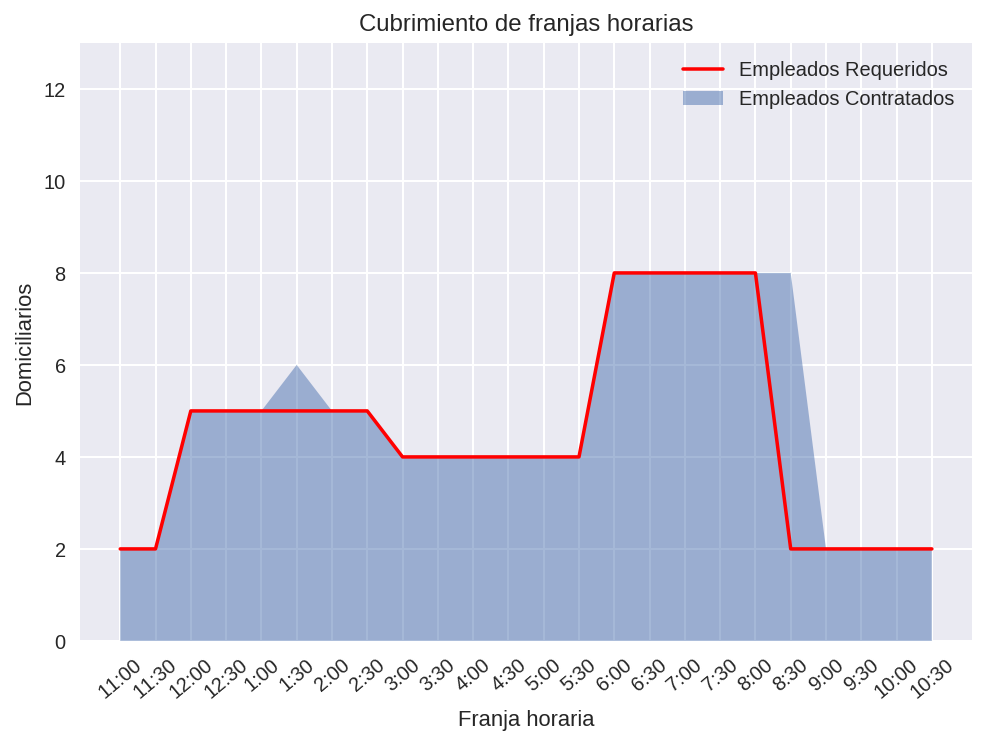

In [40]:
Franjas_ = []
for f in Franjas:
    if f[4] == "p":
        Franjas_.append(f[:4])
    else:
        Franjas_.append(f[:5])

oferta = [sum(cubrimiento_2[f, t] * x[t].value() for t in Turnos_2) for f in Franjas]

plt.plot(Franjas_, list(demandas.values()), c="r", label="Empleados Requeridos")
plt.fill_between(Franjas_, oferta, alpha=0.5, label="Empleados Contratados")
plt.legend()
plt.xticks(rotation=40)
plt.xlabel("Franja horaria")
plt.ylabel("Domiciliarios")
plt.ylim(0, 13)
plt.title("Cubrimiento de franjas horarias")
plt.show()

**Reflexión**: ¿Qué diferencia importante puedes notar entre la visualización de ambos escenarios? ¿Puedes explicar esta diferencia comparando la formulación de ambos escenarios? ¿Cómo crees que afecta esto la función objetivo? Y finalmente, ¿Cúal escenario recomendarías a la empresa?

**Prueba 13 (10 puntos)**

* Como última prueba, comprobaremos que los **valores de las funciones objetivo** de ambos escenarios (`problema` y `problema2`) coincidan con las soluciones óptimas que nosotros hemos calculado. Si los modelos quedaron correctamente definidos, estos valores deberían ser correctos.
* **No debes escribir código** para esta celda, nosostros haremos las pruebas correspondientes.

In [41]:
# Esta celda esta reservada para uso del equipo docente

### Fin del laboratorio
---
Cuando hayas finalizado las preguntas, debes presionar el botón "Enviar tarea" en la parte superior.

Después de enviar el laboratorio, debes esperar algunos minutos para que se cargue la nota en Coursera.
¡Muchos éxitos!